# World food shortage problem: How can this be solved?


## Table of content
* **Section 1: Introduction**

* **Section 2: Trends in food production in Africa**

* **Section 3: Trends in food consumption in Africa**

* **Section 4: Comparing the trends in food production and consumption in Africa**

* **Section 5: Recommendations and Conclusion**




## 1.0 Introduction

According to [UN](https://www.who.int/en/news-room/detail/15-09-2017-world-hunger-again-on-the-rise-driven-by-conflict-and-climate-change-new-un-report-says) the world currently produces more than enough food to feed everyone, yet 815 million people went hungry in 2016. It is also estiimated that by 2050, with the global population expected to reach about [9.8 billion](https://www.un.org/development/desa/en/news/population/world-population-prospects-2017.html), our food supplies will be under greater stress. According to the [FAO](https://www.usnews.com/opinion/blogs/world-report/2013/03/15/development-aid-in-africa-should-focus-on-infrastructure), hunger is declining in Asia and Latin America but is rising in Africa.
In this project, I will be making use of the food [production](https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv) and the food [consumption/supply](https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv) dataset to tell a story of how the world food shortage problem can be solved. I will be making use of different visualization techniques to show trends that are readily available in the dataset.



## 2.0 Trends in Food Production in Africa

In [194]:
#import libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  #for plotting
import seaborn as sns #for plotting
sns.set(style='white') #to give the graph a particular design
plt.rc('figure', figsize=(16, 10))  # to make all the graph the same size
import plotly.express as px

In [96]:
#load the food production dataset
df = pd.read_csv('Africa Food Production (2004 - 2013).csv')

#rename the Value column to contain the units in kt
food_production = df.rename(columns={'Value': 'Value (kt)'})
food_production.head(2)

,Country,Item,Year,Value (kt)
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415


In [189]:
#the amount of food produced each year for the 45 African Countries

values_sum = (food_production.groupby(['Country', 'Year'])['Value (kt)']
              .sum().sort_values(ascending=False)).reset_index()
values_sum.head()

,Country,Year,Value (kt)
0,Nigeria,2013,179631
1,Nigeria,2012,178816
2,Nigeria,2006,168987
3,Nigeria,2008,167935
4,Nigeria,2011,167403


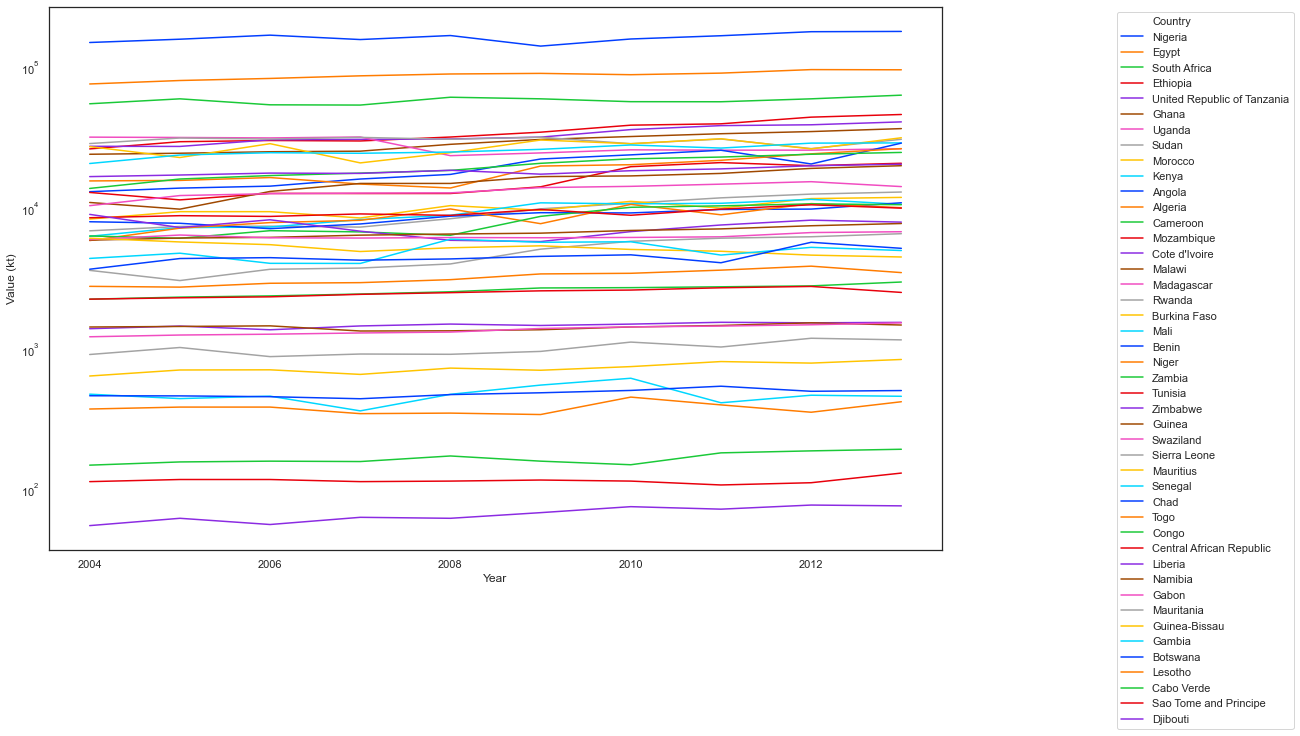

In [195]:
#visualizing the trend in food production between 2004 - 2013

trend_plot = sns.lineplot(x=values_sum['Year'], y=values_sum['Value (kt)'], 
                    hue=values_sum['Country'], palette='bright', ci=None, data=values_sum)
trend_plot.set_yscale('log')
trend_plot.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

From the lines plot, we can clearly that **Nigeria**, **Egypt**, and **South Africa** were consistently the top 3 food producing Countries in Africa. We can properly visualize this on a bar chart by ploting the mean production of these African Countries from 2004 to 2013 

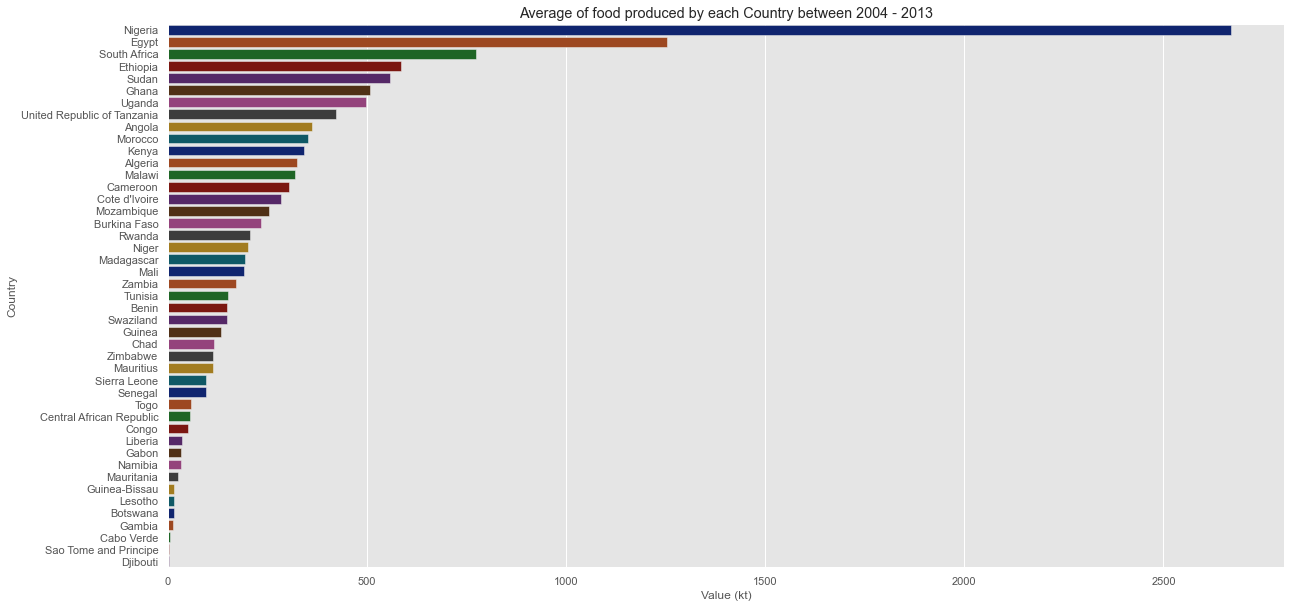

In [98]:
#Average food produce by each country for a period of 10 years between 2004 - 2013

mean_production = (food_production.groupby(['Country'])['Value (kt)'].mean()
           .sort_values(ascending=False)).reset_index().set_index('Country')

#visualize the average of the average prooduction
plt.style.use("ggplot")

plt.rcParams['figure.figsize'] = (20, 10)

sns.barplot(x=mean_production['Value (kt)'], y=mean_production.index, data=mean_production, palette='dark')
plt.gca().set_title('Average of food produced by each Country between 2004 - 2013')
plt.show()

Again, we can clearly see that averagely, **Nigeria** was the highest food producing nation with so much variation as compared to other African countries. We can also see that **Cape Verde**, **Sao Tome and Principe** were the three least food producing nations in Africa.

## 2.1 The most common/least common food items produced in Africa     from 2004-2013

In [99]:
len(food_production['Item'].unique())

94

There are 94 different food items that was produced in Africa between 2004 and 2013. To poperly visulize this, the sum of value (kt) of all the different items will be taken, to see which food items was mostly produced accross Africa.

In [100]:
#the top 20 items produced 
items = pd.DataFrame(food_production.groupby("Item")["Value (kt)"].sum().sort_values(ascending=False))[:20]
#items.head()

In [101]:
#the top 20 items produced 
items = pd.DataFrame(food_production.groupby("Item")["Value (kt)"].mean().sort_values(ascending=False))[60:80]
items.head()

,Value (kt)
Item,
Soyabean Oil,33.881818
"Offals, Edible",33.204444
Groundnut Oil,32.268571
Sunflowerseed Oil,31.725000
Peas,29.193750


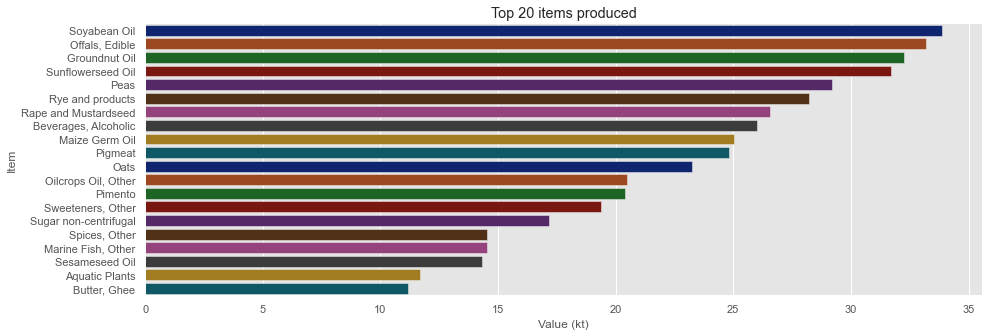

In [102]:
plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=items['Value (kt)'], y=items.index, data=items, palette='dark')
plt.gca().set_title('Top 20 items produced')
plt.show()

We can clearly see that **Cassava**, **Sugar cane**, **Maize**, **Yam** and **Vegetables** are the top five food items that were produced across Africa from 2004 to 2013 

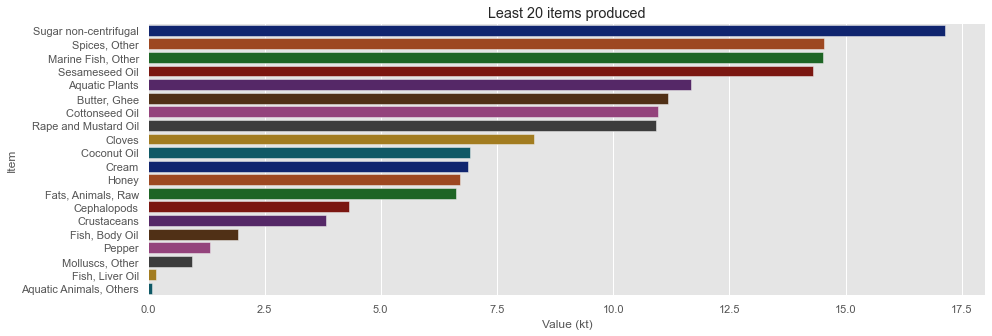

In [103]:
#least 20 items produced 
items = (pd.DataFrame(food_production.groupby("Item")["Value (kt)"]
                      .mean().sort_values(ascending=False))[-20:])
#items.head()

plt.style.use("ggplot")

plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=items['Value (kt)'], y=items.index, data=items, palette='dark')
plt.gca().set_title('Least 20 items produced')
plt.show()

From the chart we can see that **Sea Food** items were least produced in Africa.

## 2.2 Food Production by Different Regions in Africa

Which region in Africa has the highest average food production. To properly visualize this, a new column name **Region** will be created and added to the production dataset.

In [104]:
#create a set for the different countries with thier respective regions

East_Africa = {'Djibouti', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 
                  'Mauritius', 'Mozambique', 'Rwanda', 'Uganda', 
                  'United Republic of Tanzania', 'Zambia', 'Zimbabwe'}

Southern_Africa = {'Botswana', 'Lesotho', 'Namibia', 'South Africa', 'Swaziland'}

Middle_Africa = {'Angola', 'Cameroon', 'Central African Republic', 'Chad',
                 'Congo', 'Gabon', 'Sao Tome and Principe'}

North_Africa = {'Algeria', 'Egypt', 'Morocco', 'Sudan', 'Tunisia'}

West_Africa = {'Nigeria', 'Benin', 'Burkina Faso', 'Cabo Verde', 
                  "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea',
                  'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania',
                  'Niger', 'Senegal', 'Sierra Leone', 'Togo'}

Region = []

for c in food_production['Country']:
    if c in East_Africa:
        Region.append('East_Africa')
    elif c in Southern_Africa:
        Region.append('Southern_Africa')
    elif c in Middle_Africa:
        Region.append('Middle_Africa')
    elif c in North_Africa:
        Region.append('North_Africa')
    elif c in West_Africa:
        Region.append('West_Africa')
    else:
        Region.append('No_Country')
        
food_production['Region'] = Region 

#print(food_production)

In [105]:
food_production.head()

,Country,Item,Year,Value (kt),Region
0,Algeria,Wheat and products,2004,2731,North_Africa
1,Algeria,Wheat and products,2005,2415,North_Africa
2,Algeria,Wheat and products,2006,2688,North_Africa
3,Algeria,Wheat and products,2007,2319,North_Africa
4,Algeria,Wheat and products,2008,1111,North_Africa


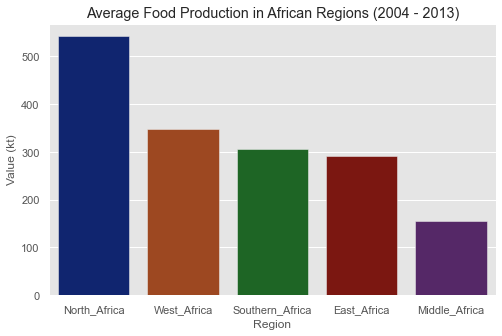

In [106]:
production_by_reg =(pd.DataFrame((food_production.groupby(['Region'])['Value (kt)']
                                  .mean()).sort_values(ascending=False)))
production_by_reg = production_by_reg.reset_index()

plt.style.use("ggplot")

plt.rcParams['figure.figsize'] = (8, 5)

(sns.barplot(x=production_by_reg['Region'], 
             y=production_by_reg['Value (kt)'], 
             data=production_by_reg, palette='dark'))
plt.gca().set_title('Average Food Production in African Regions (2004 - 2013)')
plt.show()

From this bar chart we can clearly seee that even though Nigeria (in West Africa) was the highest food producing nation in Africa, **North Africa** was the highest food producing region in Africa.

In other to have further insight from the production dataset, we can try find out which food item is mostly produced by each of the African regions

In [107]:
#creat a new dataframe for west Africa
west = food_production[food_production.Region=='West_Africa']
#west

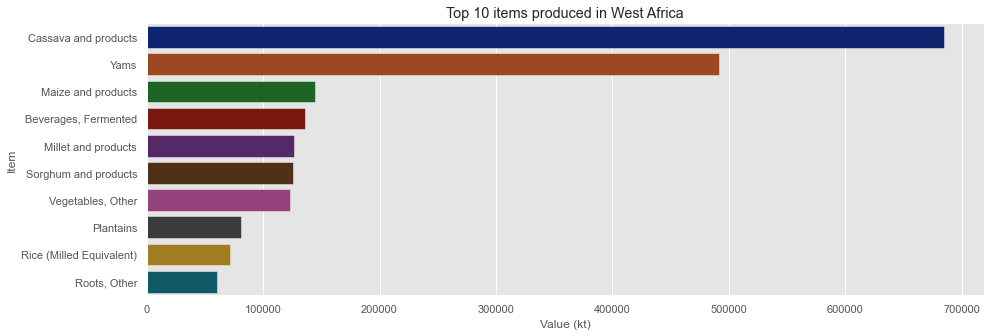

In [108]:
#the top 10 items produced produced in west africa
west_items = (pd.DataFrame(west.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]
#west_items

plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=west_items['Value (kt)'], y=west_items.index, data=west_items, palette='dark')
plt.gca().set_title('Top 10 items produced in West Africa')
plt.show()

From this plot, we can see that **cassava** and **yam** was the most common food item produced in the West Africa region.

In [109]:
#create a new dataframe for north Africa
north = food_production[food_production.Region=='North_Africa']
#north

In [110]:
#the top 10 items produced produced in north africa
north_items = (pd.DataFrame(north.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]
#north_items

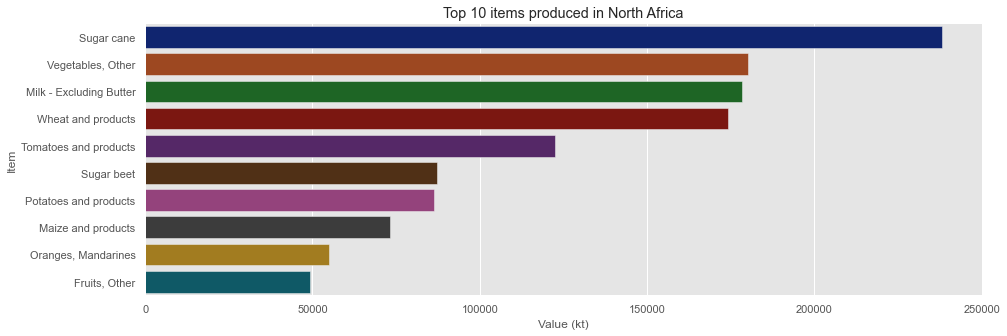

In [111]:
plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=north_items['Value (kt)'], y=north_items.index, data=north_items, palette='dark')
plt.gca().set_title('Top 10 items produced in North Africa')
plt.show()

**Sugar cane** was the most common food item produced in North African region

In [112]:
#create a new dataframe for Southern Africa
south = food_production[food_production.Region=='Southern_Africa']
#south

In [113]:
#the top 10 items produced produced in southern africa
southern_items = (pd.DataFrame(south.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]
#southern_items

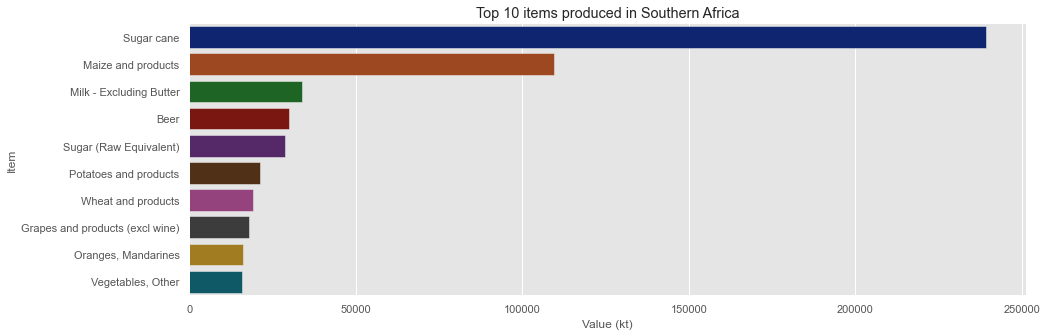

In [114]:
#the top 10 items produced produced south Africa
southern_items = (pd.DataFrame(south.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]
southern_items

plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=southern_items['Value (kt)'], y=southern_items.index, data=southern_items, palette='dark')
plt.gca().set_title('Top 10 items produced in Southern Africa')
plt.show()

Again, **Sugar cane** is seen to be the most produced item in the southern African region

In [115]:
#create a new dataframe for Southern Africa
east = food_production[food_production.Region=='East_Africa']
#east

In [116]:
#the top 10 items produced produced in east africa
east_items = (pd.DataFrame(east.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]
#east_items

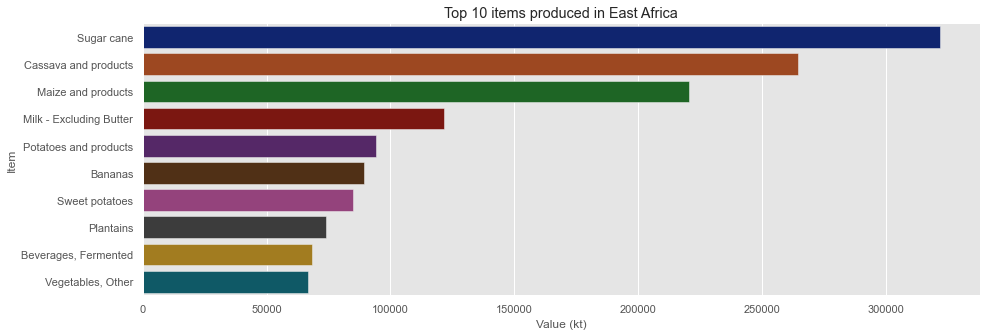

In [117]:
#the top 10 items produced produced in east africa
east_items = (pd.DataFrame(east.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]
#east_items

plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=east_items['Value (kt)'], y=east_items.index, data=east_items, palette='dark')
plt.gca().set_title('Top 10 items produced in East Africa')
plt.show()

Intrestingly, **Sugar cane** seems to be a prominent food item produced in most African regions. As we can see here again, it was the most produced item in east Africa over a period between 2004 to 2013

In [118]:
#create a new dataframe for middle Africa
mid = food_production[food_production.Region=='Middle_Africa']
#mid

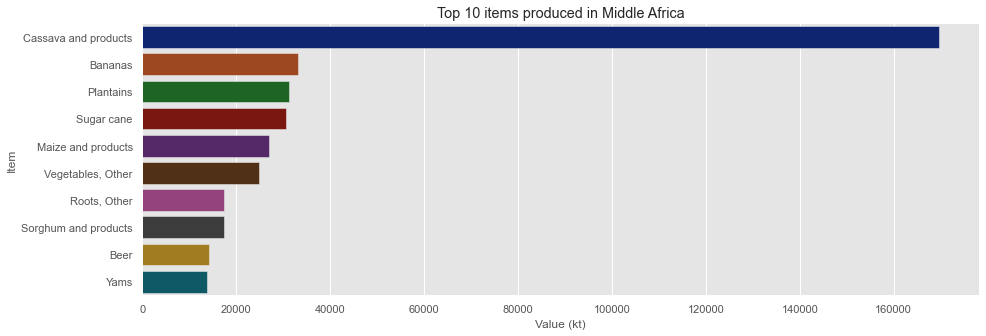

In [119]:
#the top 10 items produced produced in middle africa
mid_items = (pd.DataFrame(mid.groupby("Item")["Value (kt)"]
                           .sum().sort_values(ascending=False)))[:10]

plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(x=mid_items['Value (kt)'], y=mid_items.index, data=mid_items, palette='dark')
plt.gca().set_title('Top 10 items produced in Middle Africa')
plt.show()

The middle African region, which happens the be the least food producing region had **Cassava** as its most common food item. 

## 2.3 Checking for Outliers in the Production Dataset

In [120]:
total_production = pd.DataFrame(food_production.groupby(['Country', 'Year'])['Value (kt)'].sum())

In [121]:
total_production.head()

Value (kt)
Country Year            
Algeria 2004       15536
        2005       15667
        2006       16417
        2007       14763
        2008       13841

In [122]:
total_production = (total_production.reset_index())#.drop('index', axis=1)

In [123]:
total_production.head()

,Country,Year,Value (kt)
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


In [124]:
box_plot = px.box(total_production, x='Year', y='Value (kt)')
box_plot.show()

In [125]:
total_production.describe()

,Year,Value (kt)
count,450.000000,450.000000
mean,2008.500000,16833.591111
std,2.875478,27707.501219
min,2004.000000,55.000000
25%,2006.000000,2299.250000
50%,2008.500000,7884.500000
75%,2011.000000,20712.750000
max,2013.000000,179631.000000


In [126]:
Q1, Q3 = np.percentile(total_production['Value (kt)'], [25, 75])

In [127]:
Q1, Q3

(2299.25, 20712.75)

In [128]:
IQR = Q3 - Q1
IQR

18413.5

In [129]:
lower_fence = Q1 - (1.5 * IQR)
lower_fence

-25321.0

In [130]:
upper_fence = Q3 + (1.5 * IQR)
upper_fence

48333.0

In [131]:
upper_outlier = total_production[total_production['Value (kt)']>upper_fence]

lower_outlier = total_production[total_production['Value (kt)']<lower_fence]

outlier = pd.concat([upper_outlier, lower_outlier])

#len(list(outlier.itertuples(name=None)))
#outlier

## 2.4 Hypothesis Testing

In this section, we have been able to see that averagely, **Cassava** was the highest produced food item in Africa with an average of 3390kt. But does the cassava production in Africa increase with respect to its population? We shall formulate a hypothesis to test if this claim is true. Our two variables are defined as follows:
* X: The mean amount of cassava produced in a year
* Y: The mean population of African countries

Null Hypothesis **$H_{0}$**: There is no significant correlation between X and Y.

Alternate Hypothesis **$H_{1}$**: There is a significant correlation between X and Y.

In [132]:
cassava_prod = (food_production[food_production.Item=='Cassava and products'])#.set_index('Country')
cassava_prod.head()

,Country,Item,Year,Value (kt),Region
630,Angola,Cassava and products,2004,8587,Middle_Africa
631,Angola,Cassava and products,2005,8806,Middle_Africa
632,Angola,Cassava and products,2006,9037,Middle_Africa
633,Angola,Cassava and products,2007,9730,Middle_Africa
634,Angola,Cassava and products,2008,10057,Middle_Africa


In [133]:
country_group = (cassava_prod.groupby('Country')['Value (kt)'].mean()).to_frame()
#country_group

In [134]:
mean_cassava_prod = (cassava_prod.groupby('Year')['Value (kt)'].mean()).to_frame()
mean_cassava_prod

,Value (kt)
Year,
2004,2857.424242
2005,2934.515152
2006,3130.060606
2007,3107.090909
2008,3180.545455
2009,3181.484848
2010,3523.666667
2011,3929.181818
2012,3931.727273


The population of the different African Countries are not availablee in the dataset and therefore will have to be imported from the [World Bank Database](http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv) and merged with the **mean_cassava_by_year** dataframe in other to carry on with our testing.

In [135]:
#import population dataframe to test hypothesis

pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv", skiprows=3)

pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN


In [136]:
#change the following countries with different names from the df we want to merge with

pop.at[84, 'Country Name'] = 'Gambia'
pop.at[244, 'Country Name'] = 'United Republic of Tanzania'
pop.at[222, 'Country Name'] = 'Swaziland'
pop.at[41, 'Country Name'] = 'Congo'
pop.at[65, 'Country Name'] = 'Egypt'

In [139]:
pop1 = pop.drop(pop.columns[1:48], axis=1)
#pop1

In [140]:
pop1 = pop1.drop(pop1.columns[11:18], axis=1)
#pop1.head()

In [141]:
#change the index name to  be same with the df we wnt to join

population = (pop1.rename(columns={'Country Name': 'Country'})).set_index('Country')

#population.head()

In [142]:
#join the two data frames to extract only the African countries we need 

merge = country_group.join(other=population)
merge.head(2)

,Value (kt),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,
Angola,11428.6,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
Benin,3245.8,7750004.0,7982225.0,8216897.0,8454793.0,8696921.0,8944708.0,9199259.0,9460830.0,9729248.0,10004588.0


In [143]:
#drop the fisrt column since its not needed

merge = merge.drop(merge.columns[0], axis=1)
merge.head(2)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,
Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
Benin,7750004.0,7982225.0,8216897.0,8454793.0,8696921.0,8944708.0,9199259.0,9460830.0,9729248.0,10004588.0


In [144]:

merge.index.name = None
merge.head(2)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
Benin,7750004.0,7982225.0,8216897.0,8454793.0,8696921.0,8944708.0,9199259.0,9460830.0,9729248.0,10004588.0


In [145]:
#transpose so that we can take mean of the different years row-wise

new_df = merge.T
new_df.head()

,Angola,Benin,Burkina Faso,Cabo Verde,Cameroon,Central African Republic,Chad,Congo,Cote d'Ivoire,Gabon,...,Rwanda,Sao Tome and Principe,Senegal,Sierra Leone,Sudan,Togo,Uganda,United Republic of Tanzania,Zambia,Zimbabwe
2004,18758145.0,7750004.0,13030569.0,456617.0,17259322.0,3959875.0,9734767.0,53068880.0,17970494.0,1353795.0,...,8680524.0,153737.0,10810083.0,5433991.0,30214193.0,5467766.0,26821297.0,37379767.0,11550642.0,12019912.0
2005,19433602.0,7982225.0,13421930.0,463032.0,17733410.0,4038382.0,10096633.0,54785903.0,18354514.0,1390549.0,...,8840215.0,157472.0,11090116.0,5645624.0,30949516.0,5611640.0,27684585.0,38450320.0,11856247.0,12076699.0
2006,20149901.0,8216897.0,13829176.0,469170.0,18223674.0,4118069.0,10457124.0,56578037.0,18754916.0,1430152.0,...,9043337.0,161681.0,11382268.0,5829237.0,31661823.0,5762880.0,28571475.0,39548663.0,12173514.0,12155491.0
2007,20905363.0,8454793.0,14252021.0,475060.0,18730282.0,4198010.0,10818024.0,58453683.0,19171237.0,1472575.0,...,9273757.0,166300.0,11687080.0,5989633.0,32360621.0,5920359.0,29486338.0,40681414.0,12502958.0,12255922.0
2008,21695634.0,8696921.0,14689725.0,480842.0,19252666.0,4273366.0,11183588.0,60411195.0,19605569.0,1518540.0,...,9524534.0,171120.0,12004701.0,6133603.0,33060837.0,6083420.0,30431736.0,41853944.0,12848530.0,12379549.0


In [146]:
#create a new column for mean

new_df['Mean Population'] = new_df.mean(axis=1)
#new_df.head()

In [147]:
#define the two variables to test our hypothesis

mean_pop = new_df[['Mean Population']]

mean_pop.index.name = 'Year'

In [148]:
X = np.array([2857.42424242,2934.51515152,3130.06060606,3107.09090909,
              3180.54545455,3181.48484848,3523.66666667,3929.18181818,
              3931.72727273,4131.81818182])

Y = np.array([1.744561e+07,1.792934e+07,1.843045e+07,1.894915e+07,
              1.948539e+07,2.003890e+07,2.060947e+07,2.119698e+07,
              2.180158e+07,2.242321e+07])

In [149]:
from scipy import stats

stats.pearsonr(X, Y)

(0.9591938429640473, 1.1546598657826717e-05)

Our result shows a correlation of **0.96**, which is very high and also a p-value of **$1.15 \times 10^{-5}$**. This p-value suggests that it is highly unlikely that **$H_{0}$** is true, hence we reject the null hypothesis. Therefore, since the correlation coefficient is significantly far from 0, it implies that there is a significant correlation between mean cassava production and the mean population of African countries for respective years.

In [150]:
#test_df = mean_rice_prod.join(new_rice_pop, how='outer')
mean_cassava_prod.index = mean_cassava_prod.index.astype(int)

mean_pop.index = mean_pop.index.astype(int)

cor_viz = mean_cassava_prod.join(mean_pop, how='outer')
cor_viz

,Value (kt),Mean Population
Year,,
2004,2857.424242,1.744561e+07
2005,2934.515152,1.792934e+07
2006,3130.060606,1.843045e+07
2007,3107.090909,1.894915e+07
2008,3180.545455,1.948539e+07
2009,3181.484848,2.003890e+07
2010,3523.666667,2.060947e+07
2011,3929.181818,2.119698e+07
2012,3931.727273,2.180158e+07


In [151]:
cor_viz = cor_viz.reset_index()
fig = px.scatter(cor_viz, x='Value (kt)', y='Mean Population', text='Year')
fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels=False)

fig.show()

## 2.5 Visualizing Cassava Production on the map

In [152]:
avg_cassava_by_country = pd.DataFrame(cassava_prod.groupby(['Country', 'Year'])['Value (kt)'].sum())

In [153]:
avg_cassava_by_country.head()

Value (kt)
Country Year            
Angola  2004        8587
        2005        8806
        2006        9037
        2007        9730
        2008       10057

In [154]:
avg_cassava_by_country = avg_cassava_by_country.reset_index()

In [155]:
avg_cassava_by_country = avg_cassava_by_country.set_index('Country')

In [156]:
avg_cassava_by_country.head()

,Year,Value (kt)
Country,,
Angola,2004,8587
Angola,2005,8806
Angola,2006,9037
Angola,2007,9730
Angola,2008,10057


In [157]:
#change the index name to  be same with the df we wnt to join

code_pop = (pop.rename(columns={'Country Name': 'Country'})).set_index('Country')

#code_pop.head()

In [158]:
code = code_pop[['Country Code']]


In [159]:
prod_cassava = (avg_cassava_by_country.join(other=code)).reset_index()
prod_cassava.head()

,Country,Year,Value (kt),Country Code
0,Angola,2004,8587,AGO
1,Angola,2005,8806,AGO
2,Angola,2006,9037,AGO
3,Angola,2007,9730,AGO
4,Angola,2008,10057,AGO


In [160]:
fig = px.choropleth(prod_cassava, locations=prod_cassava['Country Code'], hover_name=prod_cassava['Country'], 
              title='Cassava Production from 2004 to 2013',
              color=prod_cassava['Value (kt)'], scope='africa', animation_frame='Year',
              labels={'Value (kt)': 'Average Cassava Production'}, color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

This map clearly shows the regions were cassava was predominantly produced in Africa. It shows here that cassava was the most produced food item in the western region (**Nigeria producing the most cassava**) in Africa as well as some parts of the easten region

## 2.6 Visualizing Sugar Cane Production on the map

**Sugar Cane** was the second most produced food item in Africa. We can also visualize this item on the map to see areas where it was predominntly produced. **Sugar cane** was the most food item produced in **North Africa**, **East Africa**, and **Southern Africa**.

In [161]:
sugar_cane_prod = (food_production[food_production.Item=='Sugar cane'])#.set_index('Country')
sugar_cane_prod.head()

,Country,Item,Year,Value (kt),Region
660,Angola,Sugar cane,2004,345,Middle_Africa
661,Angola,Sugar cane,2005,345,Middle_Africa
662,Angola,Sugar cane,2006,450,Middle_Africa
663,Angola,Sugar cane,2007,500,Middle_Africa
664,Angola,Sugar cane,2008,520,Middle_Africa


In [162]:
avg_sugar_cane_by_country = pd.DataFrame(sugar_cane_prod.groupby(['Country', 'Year'])['Value (kt)'].mean())

In [163]:
avg_sugar_cane_by_country = avg_sugar_cane_by_country.reset_index()

In [164]:
avg_sugar_cane_by_country = avg_sugar_cane_by_country.set_index('Country')

In [165]:
prod_sugar_cane = (avg_sugar_cane_by_country.join(other=code)).reset_index()
prod_cassava.head()

,Country,Year,Value (kt),Country Code
0,Angola,2004,8587,AGO
1,Angola,2005,8806,AGO
2,Angola,2006,9037,AGO
3,Angola,2007,9730,AGO
4,Angola,2008,10057,AGO


In [166]:
fig = px.choropleth(prod_sugar_cane, locations=prod_sugar_cane['Country Code'], hover_name=prod_sugar_cane['Country'], 
              title='Sugar Cane Production from 2004 to 2013',
              color=prod_sugar_cane['Value (kt)'], scope='africa', animation_frame='Year',
              labels={'Value (kt)': 'Average Sugar Cane Production'}, color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

As we can see from the map, **South Africa**, **Egypt** and **Sudan** were the highest poducers of Sugar cane

## 3.0 Trends in Food Consumption in Africa

In [167]:
#import the dataset
sup = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [168]:
#rename the Value column to contain the units in kcal/person/day
food_supply = sup.rename(columns={'Value': 'Value (kcal/person/day)'})
food_supply.head(2)

,Country,Year,Value (kcal/person/day)
0,Algeria,2004,2987
1,Algeria,2005,2958


In [169]:
#the average amount of food consumned by each country between 2004 - 2013

mean_supply = (food_supply.groupby(['Country'])['Value (kcal/person/day)'].mean()
           .sort_values(ascending=False)).reset_index().set_index('Country')
mean_supply.head()

,Value (kcal/person/day)
Country,
Egypt,3458.0
Tunisia,3305.5
Morocco,3296.7
Algeria,3111.8
Mauritius,3054.3


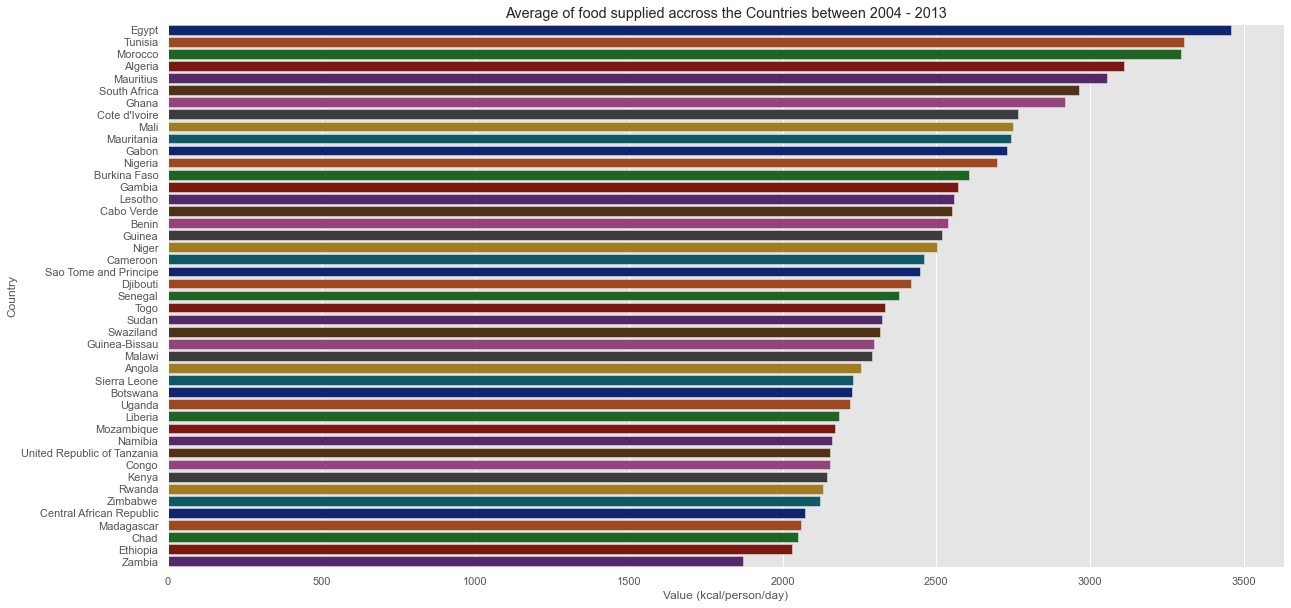

In [170]:
#visualize the average of the food consumption
plt.style.use("ggplot")

#plotting
plt.rcParams['figure.figsize'] = (20, 10)

sns.barplot(x=mean_supply['Value (kcal/person/day)'], y=mean_supply.index, data=mean_supply, palette='dark')
plt.gca().set_title('Average of food supplied accross the Countries between 2004 - 2013')
plt.show()

Averagely, **Egypt** had the average food consumption with about **3458 kcal/person/day**. This is closely followed by **Tunisia** and **Morocco**. 

Next, these countries will be grouped according to their regions so as to see how the food consumpption is distributed for each region. A new column will be created in the food_supply dtaframe. 

In [171]:
#create a set for the different countries with thier respective regions

East_Africa = {'Djibouti', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 
                  'Mauritius', 'Mozambique', 'Rwanda', 'Uganda', 
                  'United Republic of Tanzania', 'Zambia', 'Zimbabwe'}

Southern_Africa = {'Botswana', 'Lesotho', 'Namibia', 'South Africa', 'Swaziland'}

Middle_Africa = {'Angola', 'Cameroon', 'Central African Republic', 'Chad',
                 'Congo', 'Gabon', 'Sao Tome and Principe'}

North_Africa = {'Algeria', 'Egypt', 'Morocco', 'Sudan', 'Tunisia'}

West_Africa = {'Nigeria', 'Benin', 'Burkina Faso', 'Cabo Verde', 
                  "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea',
                  'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania',
                  'Niger', 'Senegal', 'Sierra Leone', 'Togo'}

Region = []

for c in food_supply['Country']:
    if c in East_Africa:
        Region.append('East_Africa')
    elif c in Southern_Africa:
        Region.append('Southern_Africa')
    elif c in Middle_Africa:
        Region.append('Middle_Africa')
    elif c in North_Africa:
        Region.append('North_Africa')
    elif c in West_Africa:
        Region.append('West_Africa')
    else:
        Region.append('No_Country')
        
food_supply['Region'] = Region 

#print(food_supply)

In [172]:
food_supply.head()

,Country,Year,Value (kcal/person/day),Region
0,Algeria,2004,2987,North_Africa
1,Algeria,2005,2958,North_Africa
2,Algeria,2006,3047,North_Africa
3,Algeria,2007,3041,North_Africa
4,Algeria,2008,3048,North_Africa


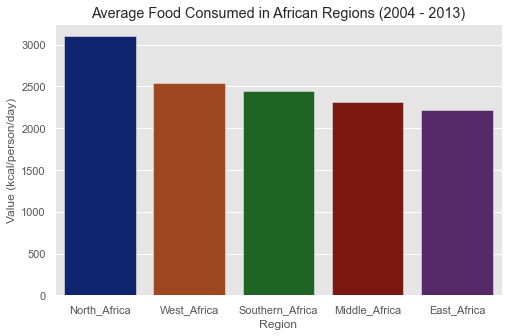

In [173]:
consumption_by_reg =(pd.DataFrame((food_supply.groupby(['Region'])['Value (kcal/person/day)']
                                  .mean()).sort_values(ascending=False)))
consumption_by_reg = consumption_by_reg.reset_index()

plt.style.use("ggplot")

plt.rcParams['figure.figsize'] = (8, 5)

(sns.barplot(x=consumption_by_reg['Region'], 
             y=consumption_by_reg['Value (kcal/person/day)'], 
             data=consumption_by_reg, palette='dark'))
plt.gca().set_title('Average Food Consumed in African Regions (2004 - 2013)')
plt.show()

As we can see from the plot, **North African** region had the highest average calory consumption per capita. And the least food consuming region was **East Africa**.

In [174]:
sup_by_code = food_supply.set_index('Country')
sup_by_code.head()

,Year,Value (kcal/person/day),Region
Country,,,
Algeria,2004,2987,North_Africa
Algeria,2005,2958,North_Africa
Algeria,2006,3047,North_Africa
Algeria,2007,3041,North_Africa
Algeria,2008,3048,North_Africa


In [175]:
new_sup_df =(sup_by_code.join(other=code)).reset_index()
new_sup_df.head()

,Country,Year,Value (kcal/person/day),Region,Country Code
0,Algeria,2004,2987,North_Africa,DZA
1,Algeria,2005,2958,North_Africa,DZA
2,Algeria,2006,3047,North_Africa,DZA
3,Algeria,2007,3041,North_Africa,DZA
4,Algeria,2008,3048,North_Africa,DZA


In [176]:
fig = px.choropleth(new_sup_df, locations=new_sup_df['Country Code'], 
                    hover_name=new_sup_df['Region'], 
                    title='Food Consumption in the Different Regions of Africa',
                    color=new_sup_df['Value (kcal/person/day)'], 
                    scope='africa', animation_frame='Year',
                    labels={'Value (kcal/person/day)': 'Food consumption per capita'},
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

## 4.0 Comparing the Average Food Production and Average Food Consumption

In [177]:
average_food_production = (food_production.groupby('Year')['Value (kt)'].mean()).to_frame()
average_food_production.head()

,Value (kt)
Year,
2004,286.767301
2005,298.986592
2006,310.814014
2007,305.215830
2008,318.686851


In [178]:
average_food_consumption = pd.DataFrame(food_supply.groupby('Year')['Value (kcal/person/day)'].mean())
average_food_consumption.head()

,Value (kcal/person/day)
Year,
2004,2394.222222
2005,2409.288889
2006,2430.800000
2007,2447.755556
2008,2460.755556


In [179]:
test = average_food_production.join(average_food_consumption, how='outer')
test

,Value (kt),Value (kcal/person/day)
Year,,
2004,286.767301,2394.222222
2005,298.986592,2409.288889
2006,310.814014,2430.800000
2007,305.215830,2447.755556
2008,318.686851,2460.755556
2009,323.040657,2482.222222
2010,340.166955,2497.400000
2011,351.303633,2515.422222
2012,364.831816,2527.644444


In [180]:
test.corr()

,Value (kt),Value (kcal/person/day)
Value (kt),1.000000,0.964003
Value (kcal/person/day),0.964003,1.000000


Ther is a strong correlation between the amount of food produced and the amount of food consumed ach year from 2004 to 2013. This correlation can be visualized in the scatter plot below

In [181]:
test = test.reset_index()
fig = px.scatter(test, x='Value (kt)', y='Value (kcal/person/day)', text='Year')
fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels=False)

fig.show()

## 5.0 Summer and Conclusion

There was a lot of variations in terms of the type of food items producd in the differen African regions. In other to solve the challenge of food shortage, the different African regions should consider producing items that were not commonly produced in their respective regions. This will make countries to be self reliant rather than being heavily dependant on food importation from other countries.

# Quiz Code

In [182]:
oat_prod = (food_production[food_production.Item=='Oats']).set_index('Country')


oat_prod[oat_prod.Year==2010].sort_values(by='Value (kt)', ascending=False)

,Item,Year,Value (kt),Region
Country,,,,
Algeria,Oats,2010,88,North_Africa
Ethiopia,Oats,2010,48,East_Africa
Morocco,Oats,2010,37,North_Africa
South Africa,Oats,2010,34,Southern_Africa
Kenya,Oats,2010,3,East_Africa
Tunisia,Oats,2010,2,North_Africa
Zimbabwe,Oats,2010,1,East_Africa
Ghana,Oats,2010,0,West_Africa
Lesotho,Oats,2010,0,Southern_Africa


**Algeria** was the highest oats producing country

In [183]:
food_2004 = ((food_supply[food_supply.Year==2004]).set_index('Country')).sort_values(by='Value (kcal/person/day)')
food_2004.head(3)

,Year,Value (kcal/person/day),Region
Country,,,
Zambia,2004,1866,East_Africa
Ethiopia,2004,1882,East_Africa
Rwanda,2004,1969,East_Africa


In [184]:
food_2005 = ((food_supply[food_supply.Year==2005]).set_index('Country')).sort_values(by='Value (kcal/person/day)')
food_2005.head(3)

,Year,Value (kcal/person/day),Region
Country,,,
Zambia,2005,1873,East_Africa
Ethiopia,2005,1978,East_Africa
Zimbabwe,2005,2025,East_Africa


In [185]:
food_2006 = ((food_supply[food_supply.Year==2006]).set_index('Country')).sort_values(by='Value (kcal/person/day)')
food_2006.head(5)

,Year,Value (kcal/person/day),Region
Country,,,
Zambia,2006,1838,East_Africa
Ethiopia,2006,1967,East_Africa
Chad,2006,2022,Middle_Africa
Central African Republic,2006,2029,Middle_Africa
Rwanda,2006,2044,East_Africa


**Zambia, Ethiopia and Central African Republic had the least food consumption between 2004 and 2006**

In [186]:
rice_prod = (food_production[food_production.Item=='Rice (Milled Equivalent)'])#.set_index('Country')
rice_prod.head()

,Country,Item,Year,Value (kt),Region
10,Algeria,Rice (Milled Equivalent),2004,0,North_Africa
11,Algeria,Rice (Milled Equivalent),2005,0,North_Africa
12,Algeria,Rice (Milled Equivalent),2006,0,North_Africa
13,Algeria,Rice (Milled Equivalent),2007,0,North_Africa
14,Algeria,Rice (Milled Equivalent),2008,0,North_Africa


In [187]:
rice_sum = pd.DataFrame(rice_prod.groupby('Country')['Value (kt)'].sum().sort_values(ascending=False))

In [188]:
rice_sum.head()

,Value (kt)
Country,
Egypt,40370
Nigeria,26964
Madagascar,26118
United Republic of Tanzania,10956
Guinea,10400


**Egypt, Nigeria and Madagascar are the top three rice producing nations**